#  World Happiness Data

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator

## Explore Data

### General Information

In [2]:
# Read in data
df = pd.read_csv("./data.csv", encoding="utf-8")

df.describe()

,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000,1838.000000
mean,2014.161437,5.479226,9.389766,0.810679,63.294583,0.747858,0.000096,0.745195,0.652143,0.271501,0.483999
std,4.718736,1.125529,1.153387,0.120952,6.901104,0.140150,0.161083,0.185837,0.105922,0.086875,0.193071
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198,0.178886,0.082737,0.068769
25%,2010.000000,4.646750,8.499764,0.746609,59.119999,0.656528,-0.112116,0.688139,0.571684,0.207660,0.332549
50%,2014.000000,5.432437,9.498955,0.835535,65.050003,0.769821,-0.022671,0.799654,0.663063,0.260671,0.467140
75%,2018.000000,6.309460,10.373216,0.904792,68.500000,0.859382,0.092070,0.868827,0.737936,0.322894,0.618846
max,2022.000000,8.018934,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276,0.883586,0.704590,0.993604


### Missing Values

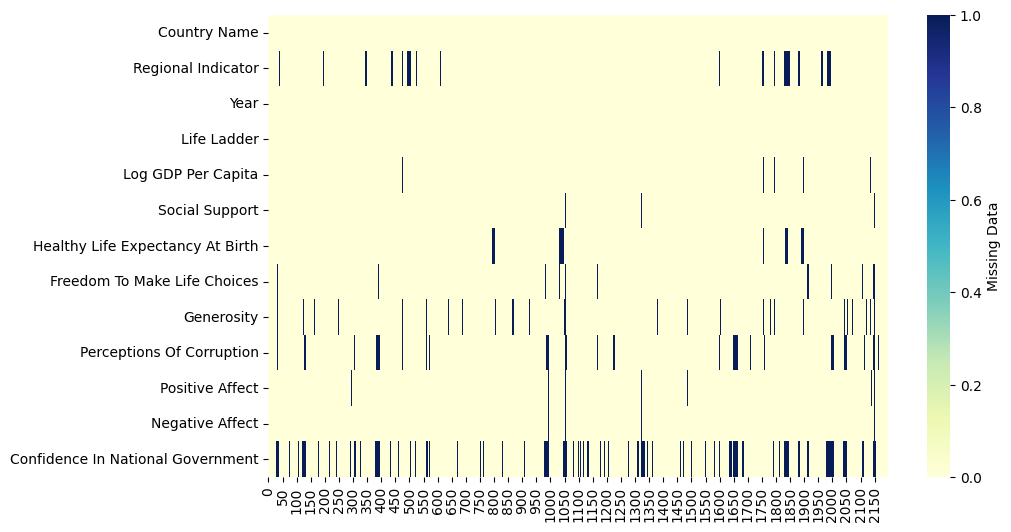

In [3]:
# Read in data
df = pd.read_csv("./data.csv", encoding="utf-8")

# Display Missing values in heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

plt.show()


### Grouped by Country

#### Life Ladder

[]

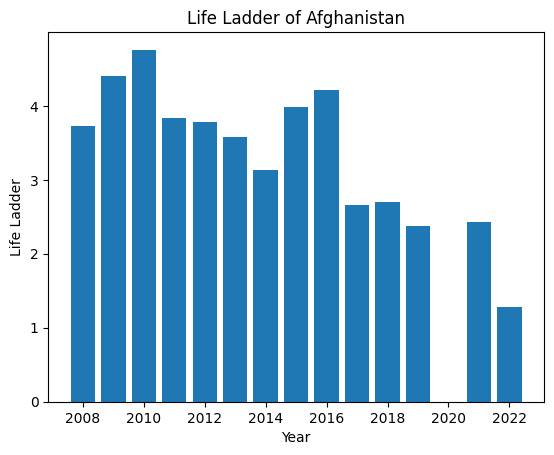

In [5]:
# Read in data
df = pd.read_csv("./data.csv", encoding="utf-8")

df_grouped_by_country = df.groupby("Country Name")

plt.title('Life Ladder of Afghanistan')
plt.xlabel('Year')
plt.ylabel('Life Ladder')
df_afghanistan = df_grouped_by_country.get_group("Afghanistan")
bar_data = df_afghanistan[["Year", "Life Ladder"]]
bar_data.head()
plt.bar(x = bar_data["Year"], height = bar_data["Life Ladder"])
plt.plot()

#### Aggregated Values per Country

In [6]:
# Read in data
df = pd.read_csv("./data.csv", encoding="utf-8")

df_grouped_by_country = df.groupby("Country Name")

# Select Country
df_afghanistan = df_grouped_by_country.get_group("Afghanistan")

# Pick relevant columns
df_afghanistan_reduced = df_afghanistan[["Life Ladder", "Log GDP Per Capita"]]

# Calculate mean values
mean_values = df_afghanistan_reduced.mean()
print("Mean Values for Afghanistan")
print(mean_values)

Mean Values for Afghanistan
Life Ladder           3.346632
Log GDP Per Capita    7.585588
dtype: float64


#### Filter by specific time range

In [7]:
# Read in data
df = pd.read_csv("./data.csv", encoding="utf-8")

df_grouped_by_country = df.groupby("Country Name")

# Select Country
df_afghanistan = df_grouped_by_country.get_group("Afghanistan")

# Filter by specific time range
df_afghanistan = df_afghanistan[(df_afghanistan["Year"] > 2012) & (df_afghanistan["Year"] < 2015)]

df_afghanistan.head()


,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
5,Afghanistan,South Asia,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328,0.482847
6,Afghanistan,South Asia,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.105755,0.871242,0.491641,0.374861,0.409048


#### Scatter Plot

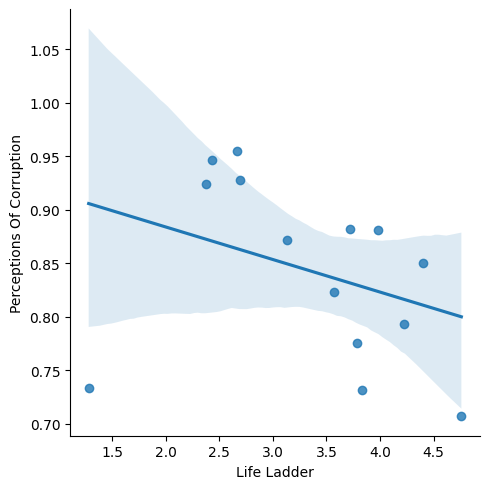

In [11]:
# Read in data
df = pd.read_csv("./data.csv", encoding="utf-8")

df_grouped_by_country = df.groupby("Country Name")

# Select Country
df_afghanistan = df_grouped_by_country.get_group("Afghanistan")

# Filter by specific time range
df_afghanistan = df_afghanistan[(df_afghanistan["Year"] > 2006)]

# plt.title('Scatter Plot for Afghanistan')
# plt.xlabel('Life Ladder')
# plt.ylabel('Perceptions of Corruption')
# plt.xticks(ticks=df_afghanistan["Life Ladder"], labels=df_afghanistan["Year"])
# plt.scatter(x = df_afghanistan["Life Ladder"], y = df_afghanistan["Perceptions Of Corruption"])
# plt.plot()

sns.lmplot(x='Life Ladder',y='Perceptions Of Corruption',data=df_afghanistan,fit_reg=True) 

#### Correlation Heat Map

<Axes: >

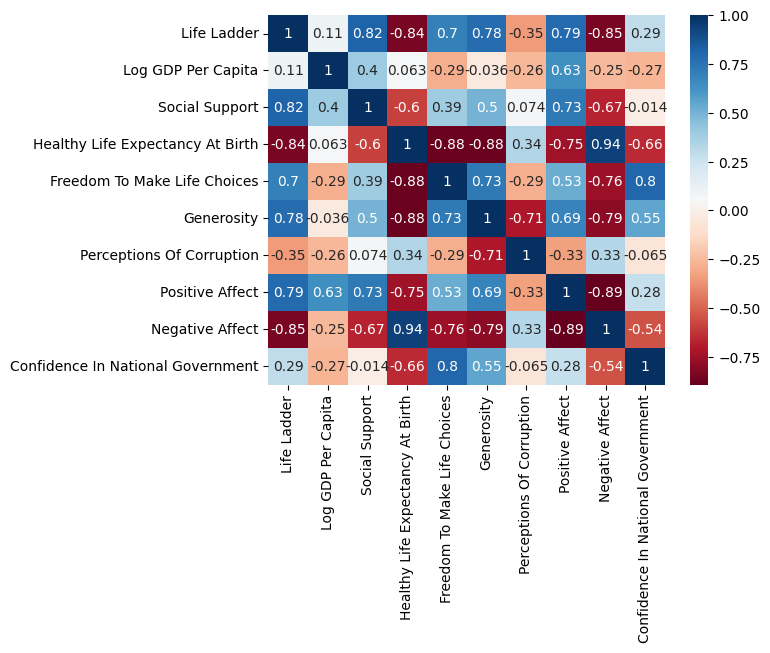

In [17]:
# Read in data
df = pd.read_csv("./data.csv", encoding="utf-8")

df_grouped_by_country = df.groupby("Country Name")

# Select Country
df_afghanistan = df_grouped_by_country.get_group("Afghanistan")

# Filter by specific time range
df_afghanistan = df_afghanistan[(df_afghanistan["Year"] > 2006)]

# Remove not needed columns
df_afghanistan = df_afghanistan.drop(["Year", "Country Name", "Regional Indicator"], axis=1)
correlation = df_afghanistan.corr()

sns.heatmap(correlation, cmap='RdBu', annot=True)

## Compare Country Ranks

### Life Ladder World Wide

In [19]:
# Read in data
df = pd.read_csv("./data.csv", encoding="utf-8")

# Filter by specific time range
df = df[(df ["Year"] > 2006)]

# Group by country and calculate mean for life ladder.
df_grouped_by_country = df.groupby("Country Name")
mean_life_ladder = df_grouped_by_country["Life Ladder"].mean() 

# Sort descending (highest element first)
mean_life_ladder.sort_values(ascending=False, inplace=True)

# Create dictionary for convenience
dict_mean_life_ladder = mean_life_ladder.to_dict()
dict_mean_life_ladder


# Pick country of interest
country_of_interest = "Afghanistan"

# As we have a dictionary we iterate over the keys until we find our matching country. The index + 1 (as lists are zero based) is our actual rank
number_of_countries_world_wide = len(df_grouped_by_country["Country Name"].unique())
rank_country_of_interest_world_wide = [i for (i, key) in enumerate(dict_mean_life_ladder.keys()) if key == country_of_interest][0] + 1
print(f"{country_of_interest} is ranked {rank_country_of_interest_world_wide} out of {number_of_countries_world_wide} Worldwide")

Afghanistan is ranked 164 out of 164 Worldwide


### Life Ladder in EU

In [20]:
from countrygroups import EUROPEAN_UNION

# Read in data
df = pd.read_csv("./data.csv", encoding="utf-8")

# Only consider countries in EU
eu_country_names = EUROPEAN_UNION.names

df_eu = df[df["Country Name"].isin(eu_country_names)]

# Filter by specific time range
df_eu = df_eu[(df_eu["Year"] > 2006)]

# Group by country and calculate mean for life ladder.
df_grouped_by_country = df_eu.groupby("Country Name")

mean_life_ladder = df_grouped_by_country["Life Ladder"].mean() 

# Sort descending (highest element first)
mean_life_ladder.sort_values(ascending=False, inplace=True)

# Create dictionary for convenience
dict_mean_life_ladder = mean_life_ladder.to_dict()

# Pick country of interest
country_of_interest = "Germany"

# As we have a dictionary we iterate over the keys until we find our matching country. The index + 1 (as lists are zero based) is our actual rank
number_of_countries_eu = len(df_grouped_by_country["Country Name"].unique())
rank_country_of_interest_eu = [i for (i, key) in enumerate(dict_mean_life_ladder.keys()) if key == country_of_interest][0] + 1
print(f"{country_of_interest} is ranked {rank_country_of_interest_eu} out of {number_of_countries_eu} in EU")

Germany is ranked 9 out of 27 in EU


## Data Cleaning

In [21]:
# Read in data
df = pd.read_csv("./data.csv", encoding="utf-8")

# Rename columns to more meaningful names
df.rename(columns={"Country Name": "country_name", "Regional Indicator": "regional_indicator", "Year": "year", "Life Ladder": "life_ladder", "Log GDP Per Capita": "log_gdp_per_capita", "Social Support": "social_support", "Healthy Life Expectancy At Birth": "healthy_life_expectancy_at_birth", "Freedom To Make Life Choices": "freedom_to_make_life_choices", "Generosity": "generosity", "Perceptions Of Corruption": "perceptions_of_corruption", "Positive Affect": "positive_affect", "Negative Affect": "negative_affect", "Confidence In National Government": "confidence_in_national_government"}, inplace=True)

df.head()

,country_name,regional_indicator,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,confidence_in_national_government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440
